In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

import warnings
warnings.filterwarnings('ignore')

In [174]:
plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [175]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시농수산식품공사 식품 판매 결과\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시농수산식품공사 식품 판매 결과\\서울시농수산식품공사 식품 판매 결과.csv']

In [176]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,거래일,품목,품종,단위,등급,가격,출하지,친환경구분(일반)
0,2022-12-19,콩나물,콩나물 수입,3.5키로,기타,2900,중국,일반
1,2022-12-19,건어류 기타,건어류 기타,10키로,기타,260000,수입,일반
2,2022-12-19,건어류 기타,건어류 기타,10키로,기타,265000,수입,일반
3,2022-12-19,봉지 미역,봉지미역(상장예외),1키로,기타,13000,전라남도 완도군,일반
4,2022-12-19,봉지 미역,봉지미역(상장예외),500그람,기타,6900,전라남도 완도군,일반


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640000 entries, 0 to 639999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래일        640000 non-null  object
 1   품목         640000 non-null  object
 2   품종         640000 non-null  object
 3   단위         640000 non-null  object
 4   등급         640000 non-null  object
 5   가격         640000 non-null  int64 
 6   출하지        640000 non-null  object
 7   친환경구분(일반)  640000 non-null  object
dtypes: int64(1), object(7)
memory usage: 39.1+ MB


In [178]:
df.describe()

,가격
count,6.400000e+05
mean,3.089618e+04
std,6.790024e+04
min,6.000000e+01
25%,3.700000e+03
50%,1.070000e+04
75%,3.200000e+04
max,8.500000e+06


In [179]:
df.describe(include=np.object)

,거래일,품목,품종,단위,등급,출하지,친환경구분(일반)
count,640000,640000,640000,640000,640000,640000,640000
unique,310,223,413,380,11,467,1
top,2022-05-02,마늘,콩나물 수입,10키로,기타,수입,일반
freq,3163,74362,57504,112048,595365,228944,640000


## 전처리

In [180]:
def to_year(x):
    return time.strptime(x,'%Y-%m-%d').tm_year
def to_month(x):
    return time.strptime(x,'%Y-%m-%d').tm_mon
def to_day(x):
    return time.strptime(x,'%Y-%m-%d').tm_mday
def to_weekday(x):
    return time.strptime(x,'%Y-%m-%d').tm_wday
df['년도'] = df['거래일'].apply(to_year)
df['월'] = df['거래일'].apply(to_month)
df['일'] = df['거래일'].apply(to_day)
df['요일'] = df['거래일'].apply(to_weekday)

In [181]:
def to_unit(x):
    if x.find('키로')>-1:
        return float(x[:-2])
    elif x.find('그람')>-1:
        return float(x[:-2])/1000

df['단위'] = df['단위'].apply(to_unit)

In [182]:
def area(x):
    if x.find('서울')>-1:
        return '서울특별시'
    elif x.find('광주광역시')>-1:
        return '광주광역시'
    elif x.find('부산')>-1:
        return '부산광역시'
    elif x.find('인천')>-1:
        return '인천광역시'
    elif x.find('대구')>-1:
        return '대구광역시'
    elif x.find('경기')>-1:
        return '경기'
    elif x.find('제주')>-1:
        return '제주'
    elif x.find('충북')>-1 or x.find('충청북도')>-1:
        return '충북'
    elif x.find('충남')>-1 or x.find('충청남도')>-1:
        return '충남'
    elif x.find('전남')>-1 or x.find('전라남도')>-1:
        return '전남'
    elif x.find('전북')>-1 or x.find('전라북도')>-1:
        return '전북'
    elif x.find('경남')>-1 or x.find('경상남도')>-1:
        return '경남'
    elif x.find('경북')>-1 or x.find('경상북도')>-1:
        return '경북'
    elif x.find('강원')>-1:
        return '강원'
    elif x.find('수입')>-1:
        return '수입'
    else:
        return '해외'
df['출하지'] = df['출하지'].apply(area)

In [183]:
df['단위가격'] = df['가격'].values/df['단위'].values

In [184]:
df.drop(['친환경구분(일반)'],axis=1,inplace=True)

**가격, 단위, 등급 분포는?**

**키로당 가격 top 5 / bottom 5**

**월,일,요일별 판매량/판매액 top 5**

**지역별 판매량/판매액 top 5**

**요일별 각 지역의 거래량은?**

## 시각화

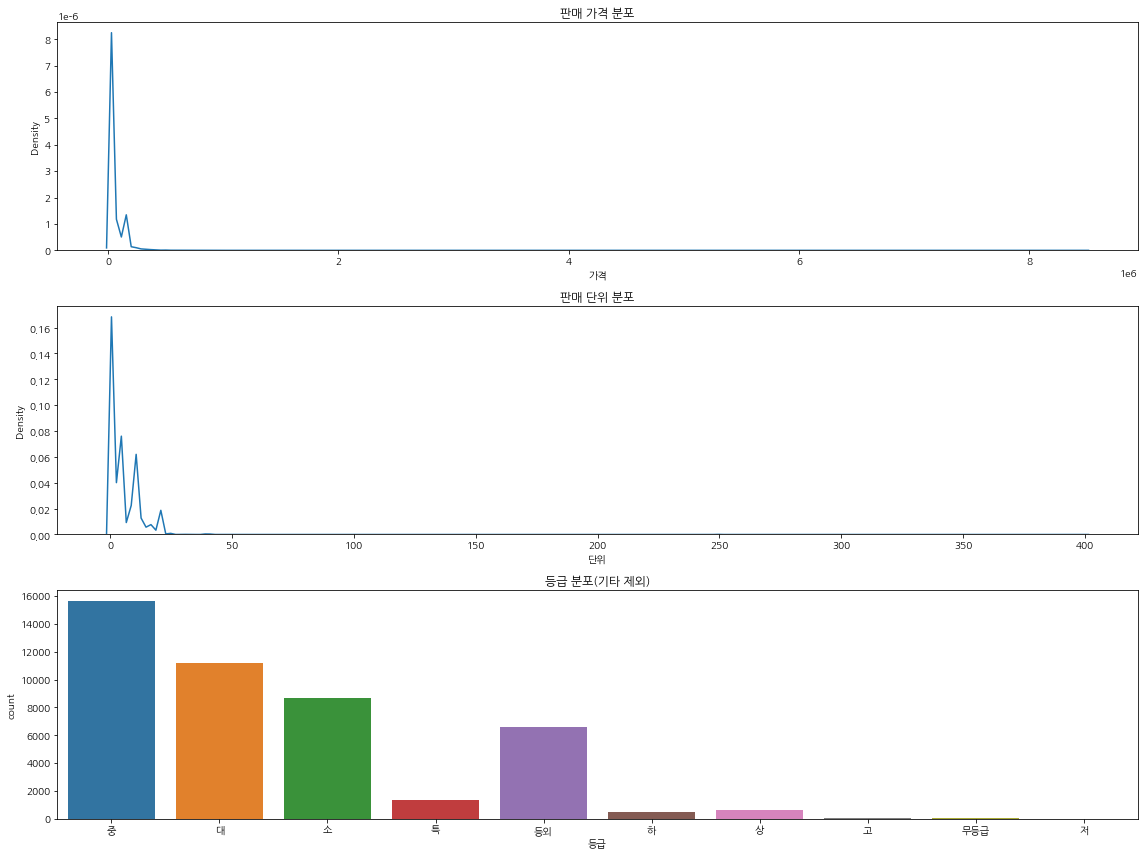

In [199]:
fig,axes = plt.subplots(3,1,figsize=(16,12))
sns.kdeplot(data=df[['가격']],x='가격',ax=axes[0]).set(title='판매 가격 분포')
sns.kdeplot(data=df[['단위']],x='단위',ax=axes[1]).set(title='판매 단위 분포')
sns.countplot(data=df[df['등급']!='기타'],x='등급',ax=axes[2]).set(title='등급 분포(기타 제외)')
plt.tight_layout()

[Text(0.5, 1.0, '품종 단위가격 bottom5')]

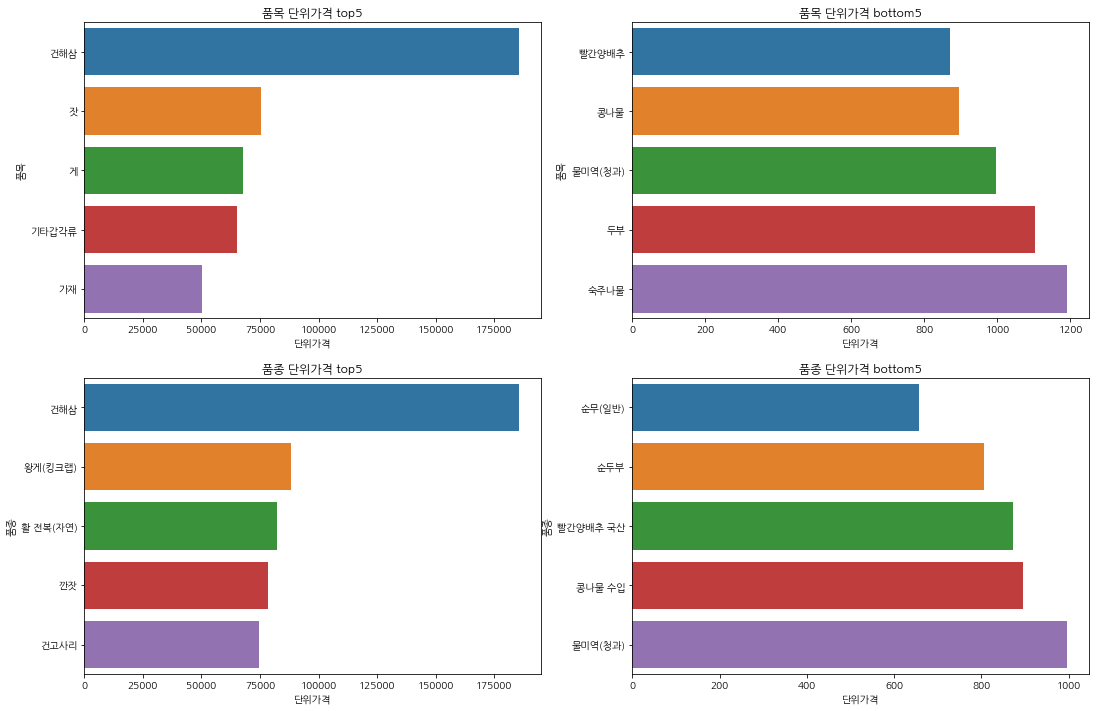

In [186]:
sub_df = df.groupby(by=['품목'],as_index=False)['단위가격'].mean()
sub_df2 = df.groupby(by=['품종'],as_index=False)['단위가격'].mean()
fig,axes = plt.subplots(2,2,figsize=(18,12))
sns.barplot(data=sub_df.sort_values('단위가격',ascending=False).head(),x='단위가격',y='품목',ax=axes[0][0]).set(title='품목 단위가격 top5')
sns.barplot(data=sub_df.sort_values('단위가격',ascending=True).head(),x='단위가격',y='품목',ax=axes[0][1]).set(title='품목 단위가격 bottom5')
sns.barplot(data=sub_df2.sort_values('단위가격',ascending=False).head(),x='단위가격',y='품종',ax=axes[1][0]).set(title='품종 단위가격 top5')
sns.barplot(data=sub_df2.sort_values('단위가격',ascending=True).head(),x='단위가격',y='품종',ax=axes[1][1]).set(title='품종 단위가격 bottom5')

<AxesSubplot: xlabel='월', ylabel='count'>

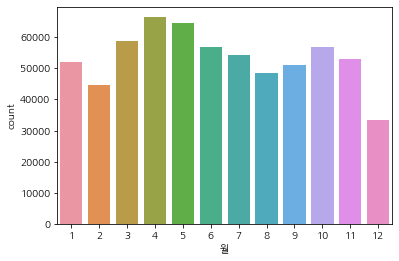

In [200]:
sns.countplot(data=df,x='월')

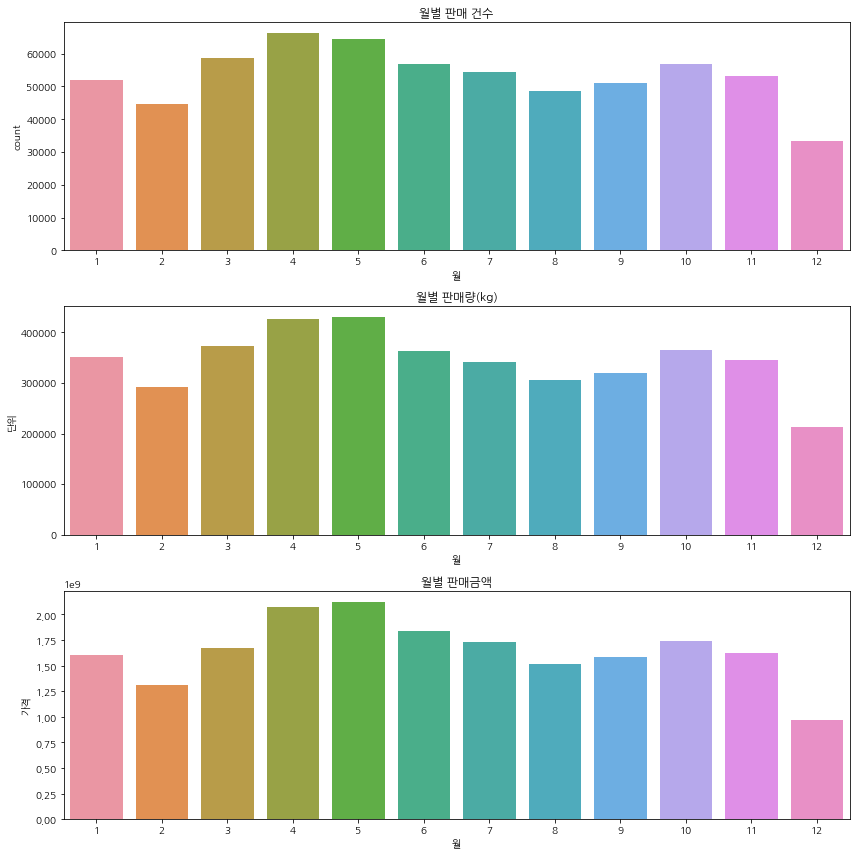

In [201]:
sub_df = df.groupby(by=['월'],as_index=False)['단위'].sum()
sub_df2 = df.groupby(by=['월'],as_index=False)['가격'].sum()
fig,axes = plt.subplots(3,1,figsize=(12,12))
sns.countplot(data=df,x='월',ax=axes[0]).set(title='월별 판매 건수')
sns.barplot(data=sub_df, x='월', y='단위', ax=axes[1]).set(title='월별 판매량(kg)')
sns.barplot(data=sub_df2, x='월', y='가격', ax=axes[2]).set(title='월별 판매금액')
plt.tight_layout()

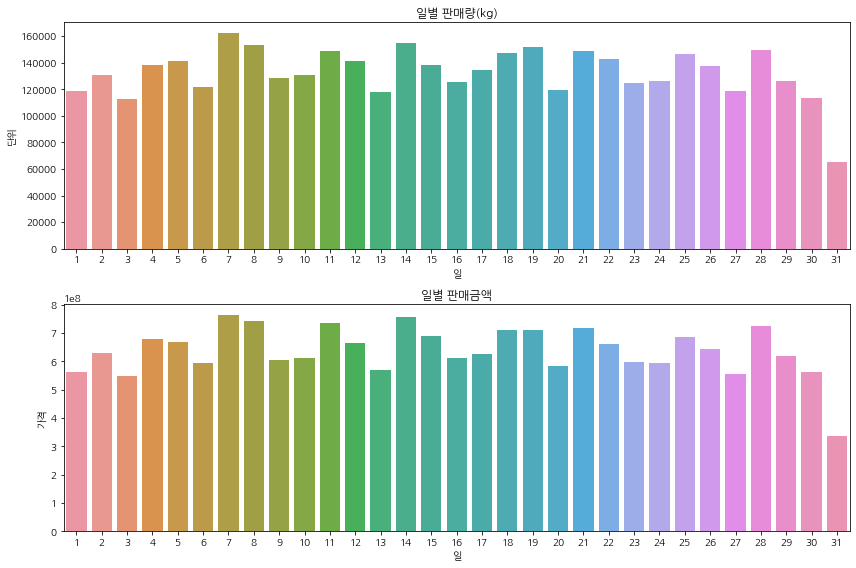

In [189]:
sub_df = df.groupby(by=['일'],as_index=False)['단위'].sum()
sub_df2 = df.groupby(by=['일'],as_index=False)['가격'].sum()
fig,axes = plt.subplots(2,1,figsize=(12,8))
sns.barplot(data=sub_df, x='일', y='단위', ax=axes[0]).set(title='일별 판매량(kg)')
sns.barplot(data=sub_df2, x='일', y='가격', ax=axes[1]).set(title='일별 판매금액')
plt.tight_layout()

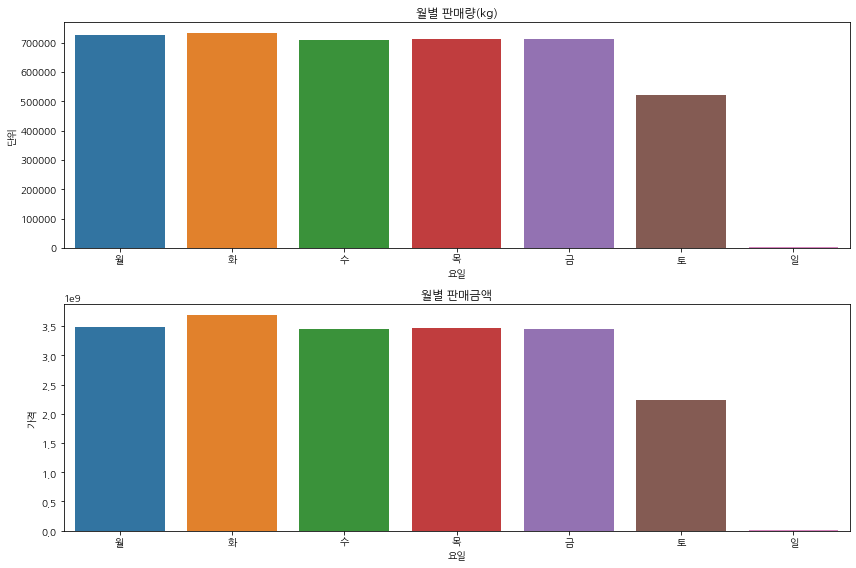

In [190]:
cols = ['월','화','수','목','금','토','일']
sub_df = df.groupby(by=['요일'],as_index=False)['단위'].sum()
sub_df2 = df.groupby(by=['요일'],as_index=False)['가격'].sum()
fig,axes = plt.subplots(2,1,figsize=(12,8))
sns.barplot(data=sub_df, x='요일', y='단위', ax=axes[0]).set(title='월별 판매량(kg)')
sns.barplot(data=sub_df2, x='요일', y='가격', ax=axes[1]).set(title='월별 판매금액')
axes[0].set_xticklabels(cols)
axes[1].set_xticklabels(cols)
plt.tight_layout()

[Text(0.5, 1.0, '출하지별 판매금액 top5')]

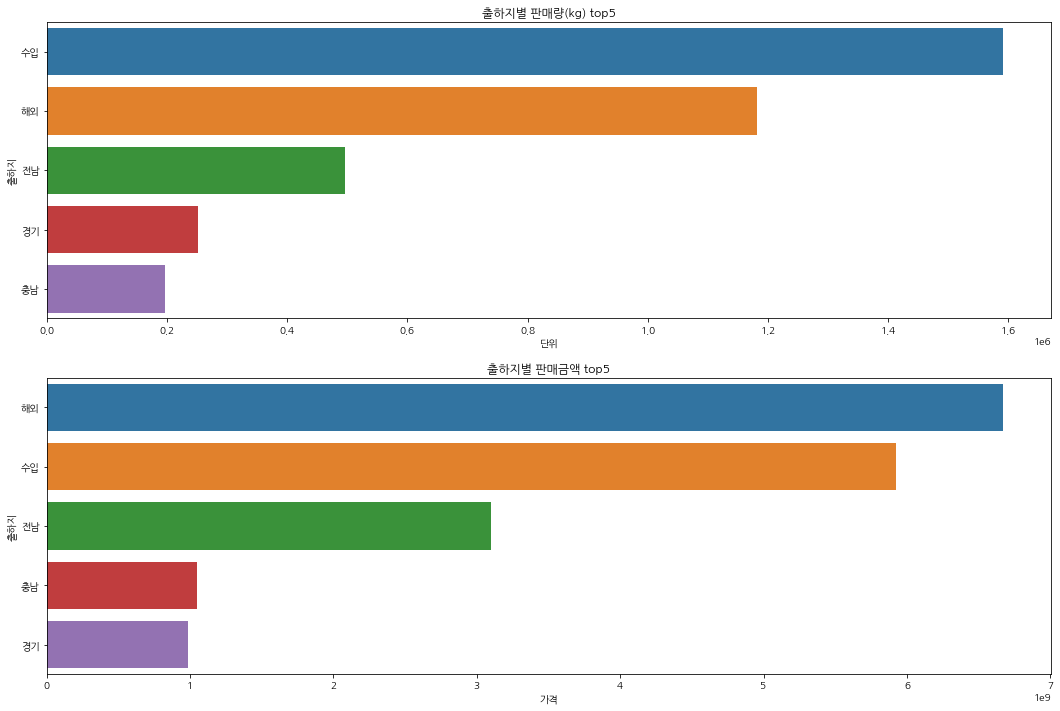

In [191]:
sub_df = df.groupby(by=['출하지'],as_index=False)['단위'].sum()
sub_df2 = df.groupby(by=['출하지'],as_index=False)['가격'].sum()
fig,axes = plt.subplots(2,1,figsize=(18,12))
sns.barplot(data=sub_df.sort_values('단위',ascending=False).head(),x='단위',y='출하지',ax=axes[0]).set(title='출하지별 판매량(kg) top5')
sns.barplot(data=sub_df2.sort_values('가격',ascending=False).head(),x='가격',y='출하지',ax=axes[1]).set(title='출하지별 판매금액 top5')

[Text(0.5, 1.0, '각 출하지 요일별 판매금액')]

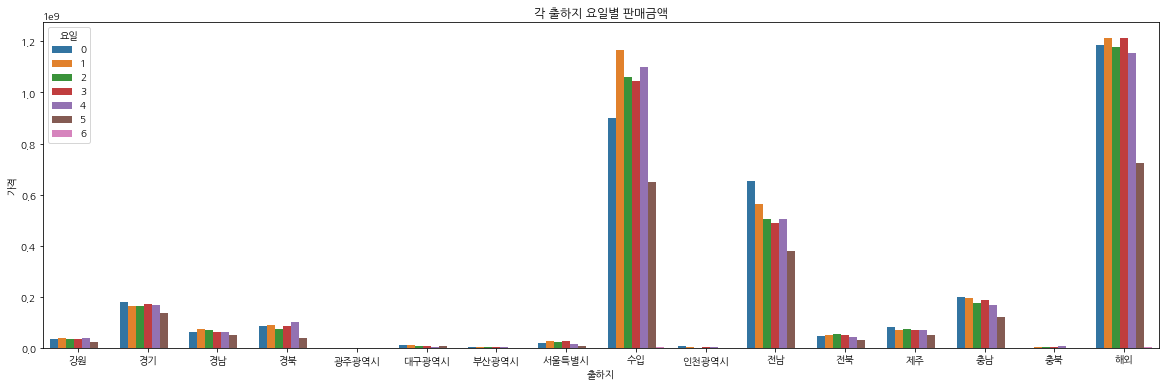

In [196]:
sub_df = df.groupby(by=['요일','출하지'],as_index=False)['가격'].sum()
plt.figure(figsize=(20,6))
sns.barplot(data=sub_df,x='출하지',y='가격',hue='요일').set(title='각 출하지 요일별 판매금액')

## 분석 결과

**가격, 단위, 등급 분포는?**

- 건당 금액은 대부분 5만원을 넘지 않고, 건당 판매 단위는 25kg을 넘지 않는다.

- 가장 많은 기타 등급을 제외했을때 중,대,소,등외 등급 순으로 많았다.

**키로당 가격 top 5 / bottom 5**

- 건해삼,갑각류 등 해산물이 주로 단위가격이 높았고 양배추,콩나물 등 채소류가 단위가격이 낮았다.

**월,일,요일별 판매량/판매액 top 5**

- 3-5월과 9-11월에 판매량과 판매액이 증가하는 추세다.

- 31일 제외하고는 일별 판매량과 판매액에 큰 차이가 없다.

- 주중에는 판매량과 판매액이 비슷하고, 토요일에 낮다.

**지역별 판매량/판매액 top 5**

- 판매량은 수입,해외,전남 순으로 많고 판매액은 해외,수입,전남 순으로 많다.

**요일별 각 지역의 거래량은?**

- 대부분 월요일에 거래량이 많고 점점 감소하는 추세지만 경남,경북,서울,수입 등은 분포가 고르거나 다른 요일에 거래량이 가장 많다.

## 분석 결과에 대한 생각

- 월별 판매량의 추세가 상이한 것은 농수산 식품의 생산 주기에 영향을 받는 것으로 보인다.

- 해외가 수입보다 판매량 대비 판매금액이 높은 것으로 보아 해산물,갑갑류 등은 해외 출하지 비율이 높은 것으로 예상한다.